#### sklearn.cluster.KMeans
* class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df)

df['cluster'] = kmeans.labels_
df['target'] = iris.target 
result = df.groupby(['target', 'cluster'])['sepal_length'].count()
result

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

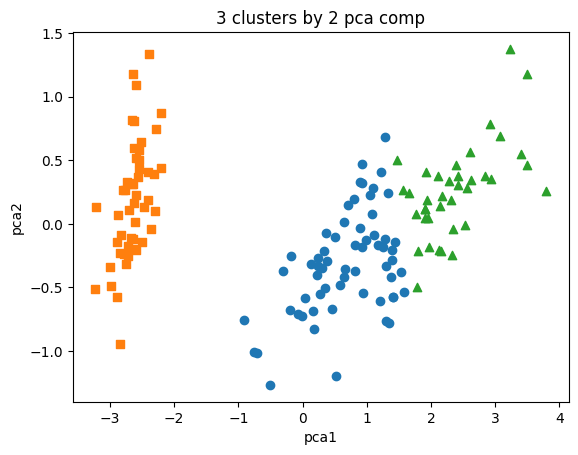

In [5]:
from sklearn.decomposition import PCA 

pca= PCA(n_components=2)
pca_transformed= pca.fit_transform(iris.data)

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df.head(3)

label0 = df[df['cluster']==0].index
label1 = df[df['cluster']==1].index
label2 = df[df['cluster']==2].index

plt.scatter(x=df.loc[label0,'pca_x'], y= df.loc[label0,'pca_y'],marker='o')
plt.scatter(x=df.loc[label1,'pca_x'], y= df.loc[label1,'pca_y'],marker='s')
plt.scatter(x=df.loc[label2,'pca_x'], y= df.loc[label2,'pca_y'],marker='^')

plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('3 clusters by 2 pca comp')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

#클러스터링할 데이터 생성 - make_blobs

x, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(x.shape, y.shape)

(200, 2) (200,)


In [7]:
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)
import pandas as pd
clusterdf = pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])
clusterdf['target'] = y
print(clusterdf.shape)
clusterdf.head(3)

[0 1 2] [67 67 66]
(200, 3)


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


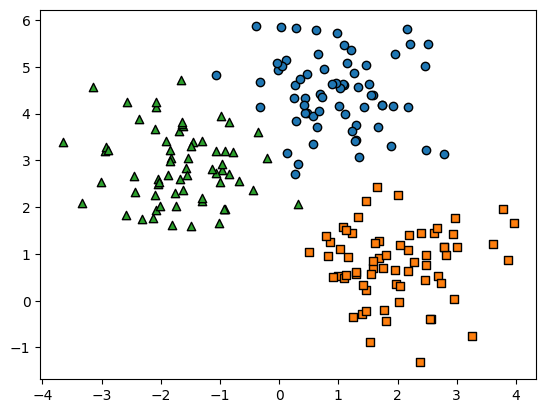

In [9]:
target_list = np.unique(y)
markers = ['o','s','^','P','D','H','x']
# target = 0, target = 1, target = 2
for target in target_list : 
    target_cluster = clusterdf[clusterdf['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'],edgecolors= 'k', marker = markers[target])
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


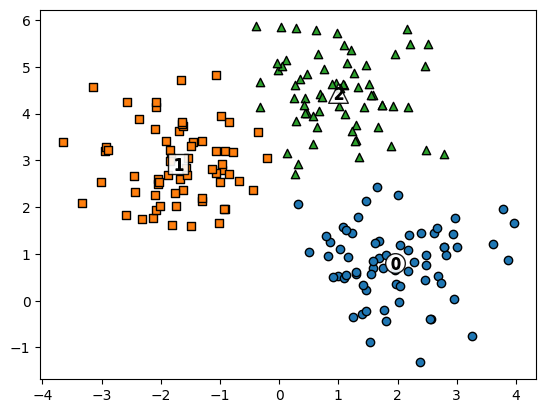

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


In [13]:
cluster_label = kmeans.fit_predict(x)
clusterdf['kmeans_label'] = cluster_label
centers=kmeans.cluster_centers_
unique_labels = np.unique(cluster_label)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster = clusterdf[clusterdf['kmeans_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k',
                marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9,edgecolor='k',marker = markers[label])
    plt.scatter(x=center_x_y[0],y= center_x_y[1], s=70, color='k',edgecolor='k',
               marker='$%d$' % label)
plt.show()

print(clusterdf.groupby('target')['kmeans_label'].value_counts())

In [14]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

x, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형 :', np.unique(cluster_labels))

meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형 : ', np.unique(cluster_labels))

#최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행

from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(x)
print('bandwidth 값 : ', round(bandwidth, 3))

cluster labels 유형 : [0 1 2 3 4 5]
cluster labels 유형 :  [0 1 2]
bandwidth 값 :  1.816


In [15]:
meanshift = MeanShift(bandwidth=1.816)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


cluster labels 유형:  [0 1 2]


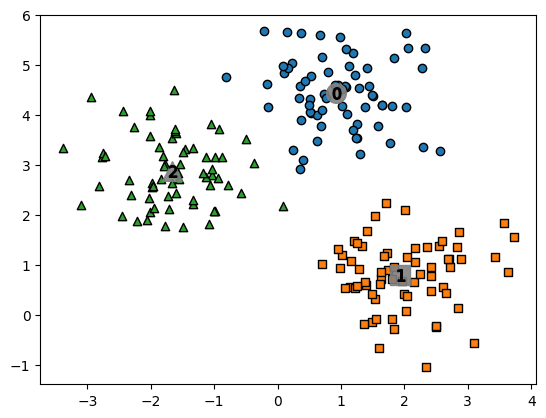

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


In [16]:
import pandas as pd

clusterdf = pd.DataFrame(data=x, columns = ['ftr1', 'ftr2'])
clusterdf['target'] = y

best_bandwidth = estimate_bandwidth(x)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형: ', np.unique(cluster_labels))

import matplotlib.pyplot as plt
%matplotlib inline

clusterdf['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels : 
    label_cluster = clusterdf[clusterdf['meanshift_label']==label]
    center_x_y = centers[label]
    
    #군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])
    
    #군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker = '$%d$'%label)
plt.show()

print(clusterdf.groupby('target')['meanshift_label'].value_counts())

cluster labels 유형:  [0 1 2]


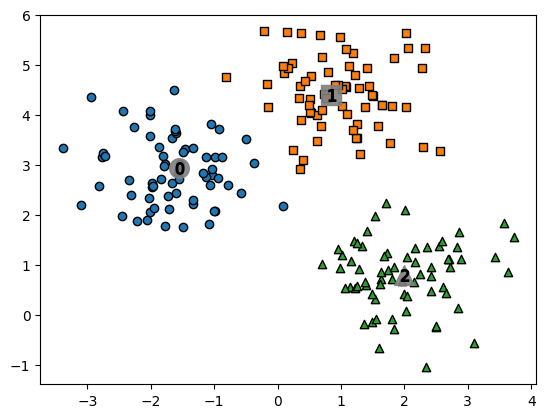

target  meanshift_label
0       1                  67
1       2                  67
2       0                  66
Name: count, dtype: int64


In [19]:
meanshift = MeanShift(bandwidth=2)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형: ', np.unique(cluster_labels))

import matplotlib.pyplot as plt
%matplotlib inline

clusterdf['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels : 
    label_cluster = clusterdf[clusterdf['meanshift_label']==label]
    center_x_y = centers[label]
    
    #군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])
    
    #군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker = '$%d$'%label)
plt.show()

print(clusterdf.groupby('target')['meanshift_label'].value_counts())